Date: 19-Aug-23

Learning from: Prasert Kanawattanachai (CBS)
- Youtube: https://www.youtube.com/prasertcbs
- Github: https://github.com/prasertcbs/

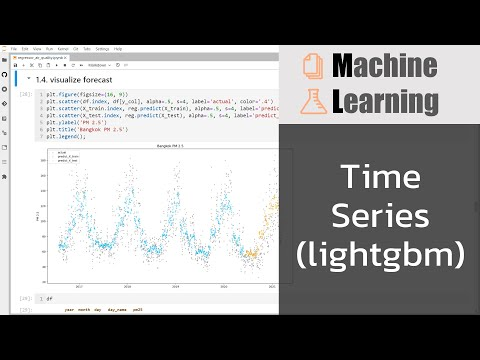

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('COtinIQk12w', width = 720, height = 405)

In [2]:
# import libraries

import sys
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
# check packages version

print(f'Python version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')

Python version: 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:48:25) 
[Clang 14.0.6 ]
pandas version: 1.5.2
numpy version: 1.25.2


In [7]:
# read data to dataframe

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/bangkok-air-quality.csv' # Aj.Prasert's github
df = pd.read_csv(url)
df.head(3)

,date,pm25,pm10,o3,no2,so2,co
0,2021/3/1,93,30,8,6,1,
1,2021/3/2,68,27,7,5,1,
2,2021/3/3,58,37,13,9,1,


In [8]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/bangkok-air-quality.csv' # Aj.Prasert's github
df = pd.read_csv(url, parse_dates = ['date'], na_values = [' '], skipinitialspace = True)
df.head(3)

,date,pm25,pm10,o3,no2,so2,co
0,2021-03-01,93.0,30.0,8.0,6.0,1.0,NaN
1,2021-03-02,68.0,27.0,7.0,5.0,1.0,NaN
2,2021-03-03,58.0,37.0,13.0,9.0,1.0,NaN


In [9]:
df.shape

(2624, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2624 non-null   datetime64[ns]
 1   pm25    1680 non-null   float64       
 2   pm10    2609 non-null   float64       
 3   o3      2610 non-null   float64       
 4   no2     2611 non-null   float64       
 5   so2     1877 non-null   float64       
 6   co      963 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 143.6 KB


In [11]:
df.index

RangeIndex(start=0, stop=2624, step=1)

In [12]:
df = df.sort_values('date').reset_index(drop = True).copy()
df.head(10)

,date,pm25,pm10,o3,no2,so2,co
0,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
1,2014-01-01,NaN,84.0,90.0,48.0,5.0,16.0
2,2014-01-02,NaN,84.0,119.0,63.0,7.0,14.0
3,2014-01-03,NaN,103.0,95.0,57.0,7.0,13.0
4,2014-01-04,NaN,101.0,52.0,34.0,1.0,NaN
5,2014-01-05,NaN,95.0,69.0,52.0,6.0,14.0
6,2014-01-06,NaN,78.0,61.0,46.0,9.0,11.0
7,2014-01-07,NaN,88.0,64.0,55.0,8.0,14.0
8,2014-01-08,NaN,79.0,36.0,47.0,5.0,11.0
9,2014-01-09,NaN,95.0,38.0,33.0,2.0,9.0


In [13]:
y_col = 'pm25'

df.dropna(subset = [y_col], inplace = True)
df.head(3)

,date,pm25,pm10,o3,no2,so2,co
938,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0
939,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0
940,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 938 to 2623
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1680 non-null   datetime64[ns]
 1   pm25    1680 non-null   float64       
 2   pm10    1672 non-null   float64       
 3   o3      1672 non-null   float64       
 4   no2     1672 non-null   float64       
 5   so2     943 non-null    float64       
 6   co      31 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 105.0 KB


In [15]:
df = df.reset_index(drop = True)
df

,date,pm25,pm10,o3,no2,so2,co
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0
...,...,...,...,...,...,...,...
1675,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN
1676,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN
1677,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN
1678,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN


In [16]:
# create a funtion to get year, month, day, day_name columns from 'date' column data

def date_parts(df, date_colname = 'date'):

    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day 
    df['day_name'] = df['date'].dt.day_name().astype('category')

In [17]:
# call a function

date_parts(df)
df

,date,pm25,pm10,o3,no2,so2,co,year,month,day,day_name
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0,2016,7,30,Saturday
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0,2016,7,31,Sunday
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0,2016,8,1,Monday
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0,2016,8,2,Tuesday
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0,2016,8,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
1675,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN,2021,3,10,Wednesday
1676,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN,2021,3,11,Thursday
1677,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN,2021,3,12,Friday
1678,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN,2021,3,13,Saturday


In [18]:
df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'year', 'month',
       'day', 'day_name'],
      dtype='object')

In [19]:
y_col

'pm25'

In [20]:
cols = ['date', 'year', 'month', 'day', 'day_name', y_col]

data = df[cols]
data

,date,year,month,day,day_name,pm25
0,2016-07-30,2016,7,30,Saturday,61.0
1,2016-07-31,2016,7,31,Sunday,68.0
2,2016-08-01,2016,8,1,Monday,60.0
3,2016-08-02,2016,8,2,Tuesday,68.0
4,2016-08-03,2016,8,3,Wednesday,70.0
...,...,...,...,...,...,...
1675,2021-03-10,2021,3,10,Wednesday,98.0
1676,2021-03-11,2021,3,11,Thursday,111.0
1677,2021-03-12,2021,3,12,Friday,101.0
1678,2021-03-13,2021,3,13,Saturday,96.0


In [21]:
# set 'date' column to be an index

data = data.set_index('date')
data

,year,month,day,day_name,pm25
date,,,,,
2016-07-30,2016,7,30,Saturday,61.0
2016-07-31,2016,7,31,Sunday,68.0
2016-08-01,2016,8,1,Monday,60.0
2016-08-02,2016,8,2,Tuesday,68.0
2016-08-03,2016,8,3,Wednesday,70.0
...,...,...,...,...,...
2021-03-10,2021,3,10,Wednesday,98.0
2021-03-11,2021,3,11,Thursday,111.0
2021-03-12,2021,3,12,Friday,101.0


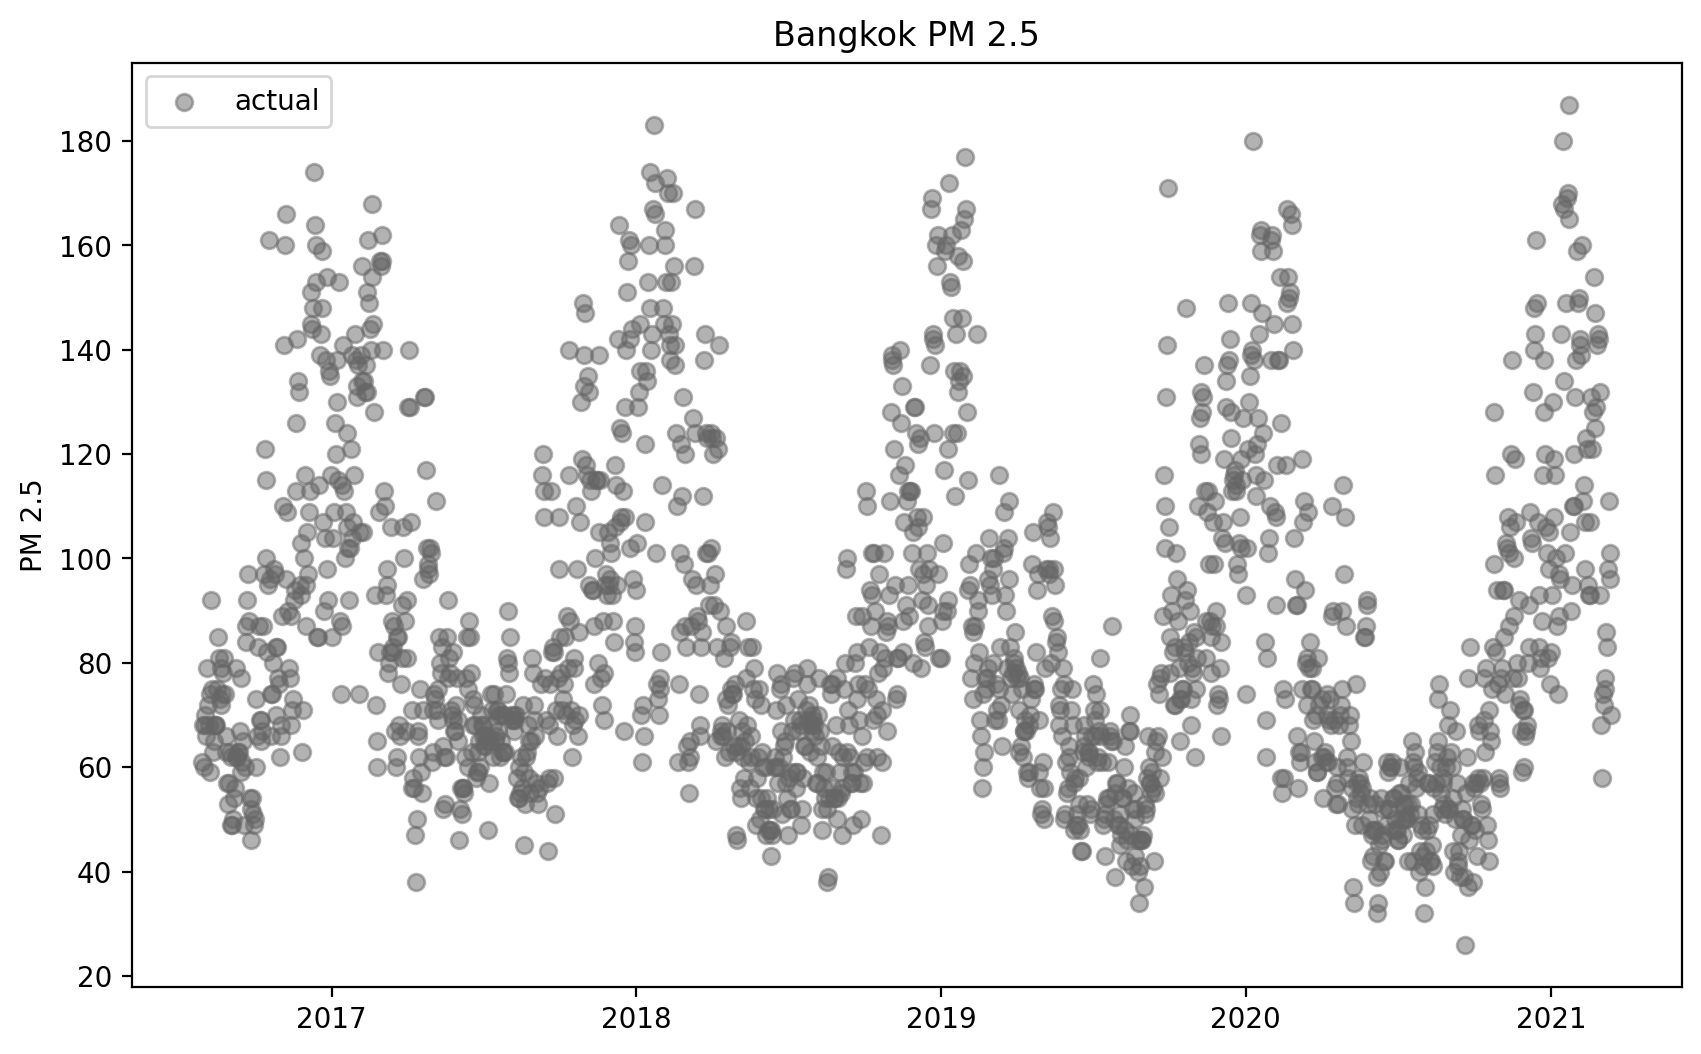

In [26]:
# visualize data

plt.figure(figsize = (10, 6))
plt.scatter(data.index, data[y_col], alpha = 0.5, label = 'actual', color = '.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();